In [1]:
import pandas as pd 

dataset = pd.read_csv("vertebral_column_data/column_3C.dat", header = None, sep = " ")
train_dataset = dataset[dataset.columns[:-1]]
training_classis = dataset.iloc[:,-1]
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
dataset_target_labels = le.fit_transform(training_classis)

In [2]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(train_dataset, dataset_target_labels, test_size=0.35)

In [3]:
Xtrain, Xtest, Ytrain, Ytest

(         0      1      2      3       4       5
 95   57.52  33.65  50.91  23.88  140.98  148.75
 44   56.03  16.30  62.28  39.73  114.02   -2.33
 174  61.41  25.38  39.10  36.03  103.40   21.84
 241  51.53  13.52  35.00  38.01  126.72   13.93
 299  82.91  29.89  58.25  53.01  110.71    6.08
 ..     ...    ...    ...    ...     ...     ...
 216  50.91   6.68  30.90  44.24  118.15   -1.06
 60   74.38  32.05  78.77  42.32  143.56   56.13
 238  69.00  13.29  55.57  55.71  126.61   10.83
 298  66.51  20.90  31.73  45.61  128.90    1.52
 6    53.43  15.86  37.17  37.57  120.57    5.99
 
 [201 rows x 6 columns],
           0      1      2      3       4      5
 302   54.60  21.49  29.36  33.11  118.34  -1.47
 45    50.91  23.02  47.00  27.90  117.42  -2.53
 62    44.53   9.43  52.00  35.10  134.71  29.11
 269   37.14  16.48  24.00  20.66  125.01   7.37
 195   71.24   5.27  86.00  65.97  110.70  38.26
 ..      ...    ...    ...    ...     ...    ...
 284   59.17  14.56  43.20  44.60  121.04 

In [4]:
Xtrain.shape, Xtest.shape

((201, 6), (109, 6))

In [5]:
Ytrain.shape, Ytest.shape

((201,), (109,))

In [6]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np 

0.8609523809523809 21


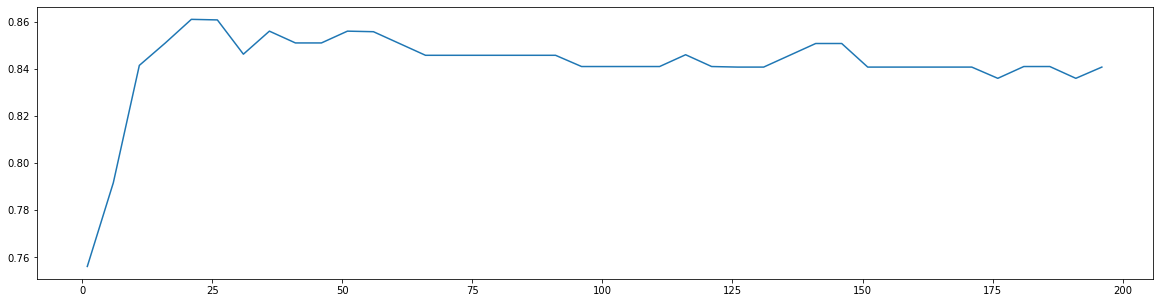

In [7]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
scorel = []
for i in range(0,200,5):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=0)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*5)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,5),scorel)
plt.show()

0.8459523809523809 113


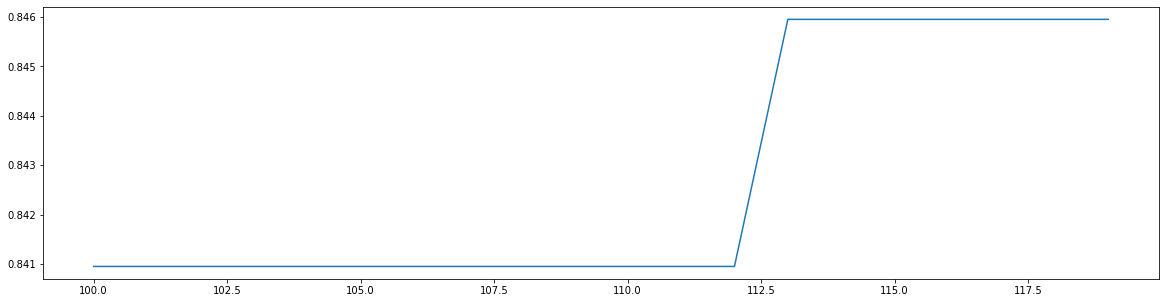

In [8]:
scorel = []
for i in range(100,120):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=0)
    score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(100,120)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(100,120),scorel)
plt.show()

AVG:0.739605488850772


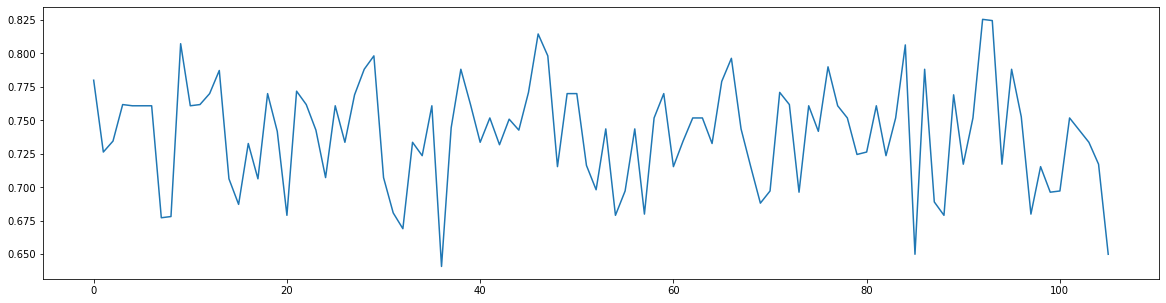

In [9]:
rfc = RandomForestClassifier(n_estimators=106, random_state=0)
rfc.fit(Xtrain, Ytrain)

from sklearn.metrics import accuracy_score 

acc_test_score = []

for i in range(0, 106):
    clf = rfc.estimators_[i]
    score = cross_val_score(clf,Xtest,Ytest,cv=10).mean()
    acc_test_score.append(score)
    
print(f"AVG:{sum(acc_test_score)/len(acc_test_score)}")
plt.figure(figsize=[20,5])
plt.plot(range(0,106), acc_test_score)
plt.show()

In [10]:
rfc = RandomForestClassifier(n_estimators=106,
                                 n_jobs=-1,
                                 random_state=0)
train_score = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
test_score = cross_val_score(rfc,Xtest,Ytest,cv=10).mean()
train_score, test_score

(0.840952380952381, 0.8527272727272728)

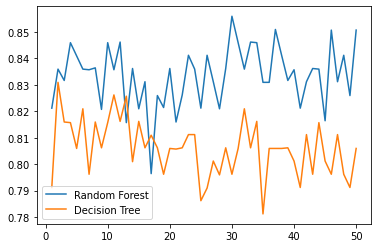

In [11]:
from sklearn.tree import DecisionTreeClassifier
rfc_l = []
clf_l = []
for i in range(50):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,Xtrain,Ytrain,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,51),rfc_l,label = "Random Forest")
plt.plot(range(1,51),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

In [12]:
rfc.fit(Xtrain, Ytrain)
feature_name = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]
[*zip(feature_name, rfc.feature_importances_)]

[('pelvic_incidence', 0.09967931606064667),
 ('pelvic_tilt', 0.08221268235313996),
 ('lumbar_lordosis_angle', 0.14832947202838784),
 ('sacral_slope', 0.1468033471979643),
 ('pelvic_radius', 0.12940902425382086),
 ('degree_spondylolisthesis', 0.3935661581060404)]

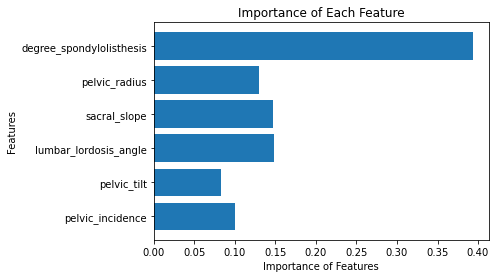

In [13]:
plt.barh(range(len(rfc.feature_importances_)), rfc.feature_importances_,tick_label = feature_name)
plt.yticks(range(6), feature_name)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()

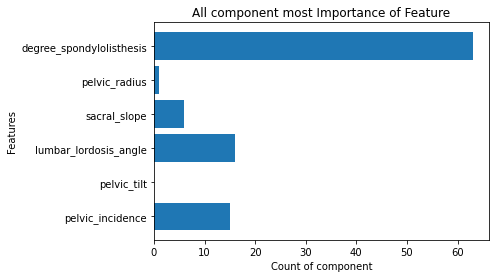

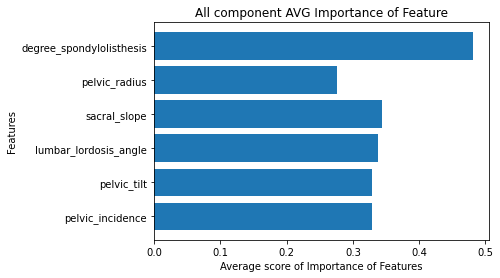

In [14]:
rfc = RandomForestClassifier(n_estimators=101)
rfc.fit(Xtrain, Ytrain)

col1 = []
col2 = []
col3 = []
col4 = []
col5 = []
col6 = []


for i in range(0, 101):
    clf = rfc.estimators_[i]
    if(clf.feature_importances_.argmax()==0):
        col1.append(clf.feature_importances_[0])
    elif(clf.feature_importances_.argmax()==1):
        col2.append(clf.feature_importances_[1])
    elif(clf.feature_importances_.argmax()==2):  
        col3.append(clf.feature_importances_[2])
    elif(clf.feature_importances_.argmax()==3): 
        col4.append(clf.feature_importances_[3])
    elif(clf.feature_importances_.argmax()==4):  
        col5.append(clf.feature_importances_[4])
    elif(clf.feature_importances_.argmax()==5):  
        col6.append(clf.feature_importances_[5])
    
    
count = [len(col1),len(col2),len(col3),len(col4),len(col5),len(col6)]
avg = [sum(col1)/len(col1),sum(col1)/len(col1),sum(col3)/len(col3),sum(col4)/len(col4),sum(col5)/len(col5),sum(col6)/len(col6)]

plt.barh(range(len(count)), count,tick_label = feature_name)
plt.yticks(range(6), feature_name)
plt.title('All component most Importance of Feature')
plt.ylabel('Features')
plt.xlabel('Count of component')
plt.show()

plt.barh(range(len(count)), avg,tick_label = feature_name)
plt.yticks(range(6), feature_name)
plt.title('All component AVG Importance of Feature')
plt.ylabel('Features')
plt.xlabel('Average score of Importance of Features')
plt.show()

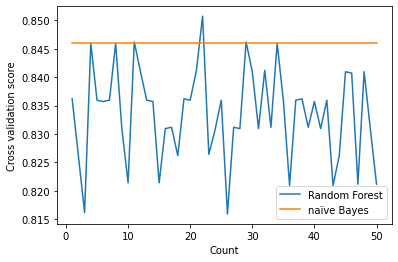

In [15]:
from sklearn.naive_bayes import GaussianNB

nb_l = []
rfc_l = []

for i in range(50):
    rfc = RandomForestClassifier()
    rfc_s = cross_val_score(rfc,Xtrain,Ytrain,cv=10).mean()
    rfc_l.append(rfc_s)

    nb = GaussianNB()
    nb_s = cross_val_score(nb,Xtrain,Ytrain,cv=10).mean()
    nb_l.append(nb_s)
    
plt.plot(range(1,51),rfc_l,label = "Random Forest")
plt.plot(range(1,51),nb_l,label = "naïve Bayes")
plt.ylabel('Cross validation score')
plt.xlabel('Count')
plt.legend()
plt.show()

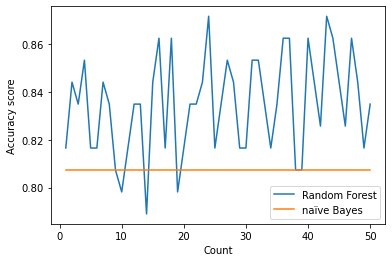

In [16]:
nb_l = []
rfc_l = []

for i in range(50):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc.fit(Xtrain, Ytrain)
    pred = rfc.predict(Xtest)
    rfc_l.append(accuracy_score(Ytest, pred))

    gb = GaussianNB()
    gb.fit(Xtrain, Ytrain)
    pred = gb.predict(Xtest)
    nb_l.append(accuracy_score(Ytest, pred))
    
plt.plot(range(1,51),rfc_l,label = "Random Forest")
plt.plot(range(1,51),nb_l,label = "naïve Bayes")
plt.ylabel('Accuracy score')
plt.xlabel('Count')
plt.legend()
plt.show()